In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.app.flags.DEFINE_string('f', '', 'kernel')

## Set GPU

In [0]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


## Loading module from disk

In [0]:
from gan.tf_utils.hub_module_utils import load_module

In [0]:
model_folder = "/srv/data/ahoorelbeke/gan_model_folder/anime/biggan_anime_2disc/tfhub/10000"

In [0]:
sess, module = load_module(model_folder, with_accu=True, reset_graph=True)

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from /srv/data/ahoorelbeke/gan_model_folder/anime/biggan_anime_2disc/tfhub/10000/model-with-accu.ckpt


INFO:tensorflow:Restoring parameters from /srv/data/ahoorelbeke/gan_model_folder/anime/biggan_anime_2disc/tfhub/10000/model-with-accu.ckpt


## Prepare inputs

In [0]:
module.get_input_info_dict()

{'labels': <hub.ParsedTensorInfo shape=(?,) dtype=int32 is_sparse=False>,
 'z': <hub.ParsedTensorInfo shape=(?, 120) dtype=float32 is_sparse=False>}

In [0]:
batch_size = 60

In [0]:
labels = tf.zeros((batch_size,), dtype=tf.int32)

In [0]:
z = tf.random.normal((batch_size, 120))

## Generate images

In [0]:
outputs = module({
    "labels": labels,
    "z": z
}, as_dict=True)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [0]:
np_images = sess.run(outputs["generated"])

## Visualize images

In [0]:
np_images.shape

(60, 128, 128, 3)

In [0]:
from skimage.transform import resize

In [0]:
rs_images= []
for f in range(0, batch_size):
    rs_images.append(resize(np_images[f], (64, 64, 3)))
    rs_images[f] = np.mean(rs_images[f], axis=-1)
    rs_images[f] = rs_images[f].flatten()

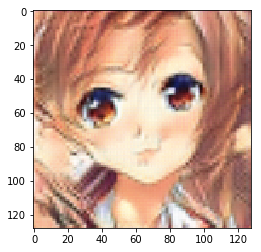

In [0]:
plt.imshow(np_images[0])

In [0]:
rs_images[0].shape

(4096,)

## Load dataset

In [0]:
dataset_path = "/srv/data/datasets/gan/anime/dataset.json"

In [0]:
import json

In [0]:
with open(dataset_path, "r") as f:
    lines = [json.loads(line) for line in f]

In [0]:
first_image = lines[0]

In [0]:
first_image["image_path"]

'/srv/data/datasets/gan/anime/images/8622.png'

In [0]:
import matplotlib.image as mpimg
img = mpimg.imread(first_image["image_path"])


In [0]:
imgs = []
for x in range(0, 2000):
    imgs.append(mpimg.imread(lines[x]["image_path"]))

In [0]:
len(imgs)

2000

In [0]:
import numpy as np

In [0]:
import cv2

In [0]:
for i in range (0, len(imgs)):
    imgs[i] = np.mean(imgs[i], axis=2)
    imgs[i] = imgs[i].flatten()

## t-SNE to the dataset

In [0]:
import sklearn
from sklearn.manifold import TSNE

In [0]:
X = np.array(imgs + rs_images)
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2060 samples in 2.131s...
[t-SNE] Computed neighbors for 2060 samples in 37.712s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2060
[t-SNE] Computed conditional probabilities for sample 2000 / 2060
[t-SNE] Computed conditional probabilities for sample 2060 / 2060
[t-SNE] Mean sigma: 3.791104
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.649147
[t-SNE] KL divergence after 300 iterations: 2.352891


In [0]:
imgs[0].shape

(64, 64, 3)

In [0]:
imgs[20].shape

(64, 64, 3)

In [0]:
np.mean(imgs[20], axis=2).shape

(64, 64)

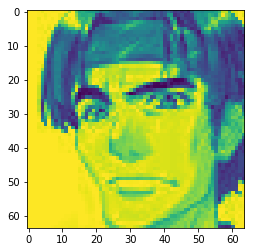

In [0]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)np.mean(imgs[20], axis=-1))

## Visualize closest neighbors of the generated images

In [0]:
imgs[3].shape

(4096,)

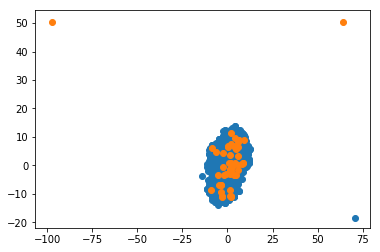

In [0]:
results.shape
plt.scatter(results[0:2000, 0], results[0:2000, 1])
plt.scatter(results[2000:, 0], results[2000:, 1])

In [0]:
np.argwhere(results[:, 1] > 40)

array([[2026],
       [2048]])

In [0]:
image = mpimg.imread(lines[480]["image_path"])

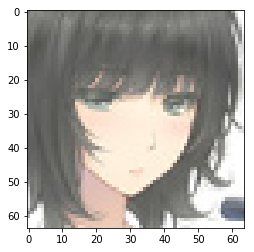

In [0]:
plt.imshow(image)

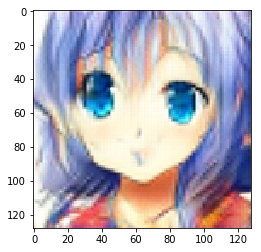

In [0]:
plt.imshow(np_images[27])